# Numerical Methods Assignment 01

## Name: Sujoy Karmakar

# * Question 1

##### To find the specifications of the Intel XEON Platinum 8168, I've used the website: https://www.intel.com/content/dam/support/us/en/documents/processors/APP-for-Intel-Xeon-Processors.pdf
* Here the number of floating point operations per second done by single processor is:    **P =  1459.2 Giga FLOPS = 1.4592 Tera FLOPS**
* Now required performence is **100 Tera flops.**
* So required number of processors is:  **n = 100/P = 68.53**
* So, We need **69** processors to acheive the required performence.

# * Question 2

##### The given code is,
```
a = [i for i in range(1,11)]
b = a*13
for i in range(1,11):
    print (i, "x 13", "=", b[i])
```

* Here the code will not work properly as here we are directly multiplying a the list "a" by 13 which will produce **b = a*13 = [1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10,1,2,3,...........10]**, i.e. repeat the list for 13 times instead of multiplying each term by 13. Also in python, by deafult the integer counting starts from 0. So in the **for** loop, we have to start from 0, and not 1. Otherwise we'll goanna loose the first element.

* There are so many ways to do this. One of the corrected version is given below,


In [524]:
a = [i for i in range(1,11)]
for i in range(1,11):
    print (i, "x 13", "=", a[i-1]*13)

1 x 13 = 13
2 x 13 = 26
3 x 13 = 39
4 x 13 = 52
5 x 13 = 65
6 x 13 = 78
7 x 13 = 91
8 x 13 = 104
9 x 13 = 117
10 x 13 = 130


# *Question 3

#### Solution of the first part

In [525]:
import matplotlib.pyplot as plt

Orbital_Period = []
Eccentricity = []
BH_Mass = []
Companion_Mass = []
Age = []

with open('HW1_data.txt', 'r') as f:
    next(f)

    for line_number, line in enumerate(f, start=2):
        values = line.strip().split(',')

        Orbital_Period.append(float(values[0]))
        Eccentricity.append(float(values[1]))
        BH_Mass.append(float(values[2]))
        Companion_Mass.append(float(values[3]))
        Age.append(float(values[4]))
                                      

#### Solution of the second part


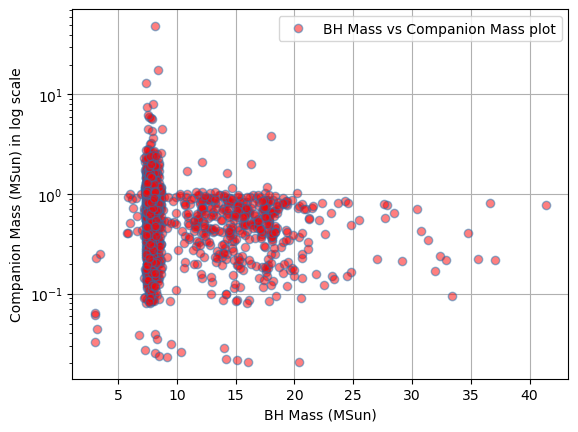

In [526]:
plt.figure()
plt.plot(BH_Mass, Companion_Mass, linestyle = 'none', marker = 'o', mfc = 'red', alpha = 0.5, label = "BH Mass vs Companion Mass plot")
plt.xlabel("BH Mass (MSun)")
plt.ylabel("Companion Mass (MSun) in log scale")
plt.yscale('log')                                                        ##Here the log scale along y axis gives much more details than linear scale
plt.legend(loc = 'best')
plt.grid()
plt.show()


#### Solution of the third part

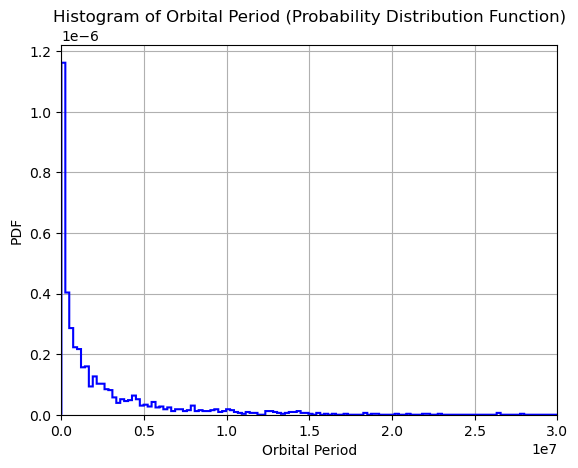

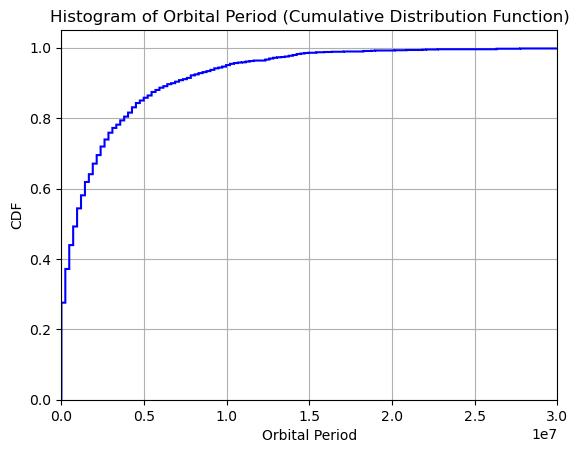

In [527]:
plt.figure()
plt.hist(Orbital_Period, bins=1400, density=True,histtype='step', alpha=1, color='blue', linewidth=1.5)
plt.xlim(0, 3e7)                                             ##Here I have restricted the range of x from 0 to 3e7 because after that there is no significant change in curve
plt.xlabel('Orbital Period')
plt.ylabel("PDF")
plt.title("Histogram of Orbital Period (Probability Distribution Function)")
plt.grid()
plt.show()

plt.figure()
plt.hist(Orbital_Period, bins=1400, density=True,histtype='step', alpha=1, color='blue', linewidth=1.5, cumulative = 'true' )
plt.xlim(0, 3e7)   
plt.xlabel('Orbital Period')
plt.ylabel("CDF")
plt.title("Histogram of Orbital Period (Cumulative Distribution Function)")
plt.grid()
plt.show()

#### Solution of the fourth part


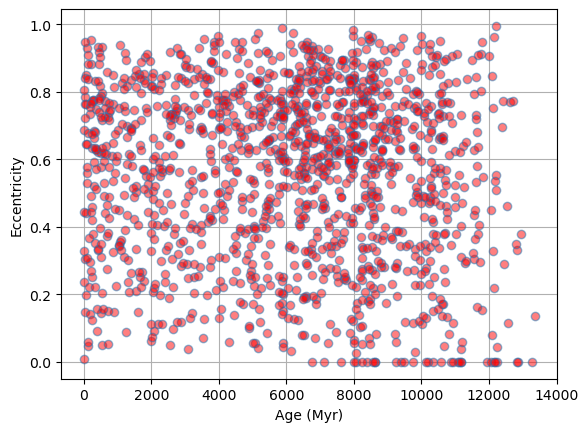

In [528]:
plt.figure()
plt.plot(Age, Eccentricity, linestyle = 'none', marker = 'o', mfc = 'red', alpha = 0.5)
plt.xlabel("Age (Myr)")
plt.ylabel("Eccentricity")
plt.grid()
plt.show()


# Question 4

#### Solution of the first part

In [529]:
##The output is in sign-magnetude format where the extreme left digit indicates if the number is +ve or -ve by 1 or 0 respectively

input_number = 7

def binary(x):
    quotient = x
    dig = []
    if x ==0:
        print("Ans is: 0")
    if x!=0:
        while quotient > 1:
            dig.append(str(quotient % 2))
            quotient = quotient // 2
        dig.append(str('1'))                                         ##Added the remainder 1 which was not added by the above loop
        if x >= 1:
            dig.append(str('1'))
        if x <=-1:
            dig.append(str('0'))
        reversed_dig = dig[::-1]
        joined_digits = ''.join(reversed_dig)
        print("Ans is (First bit is sign bit): ", joined_digits)



binary(input_number)


Ans is (First bit is sign bit):  1111


# Question 6

#### Solution of the 1st part

In [530]:
input = 7

def fact(x):
    if x < 0:
        print("Error!!!!! \n"
              "Input is 0 or negative")
    if (x - int(x)) != 0:
        print("Error!!!!! \n"
              "Put integer number")
    if x ==0:
        return 1
    if (x - int(x)) == 0:
        term = x
        factorial = 1
        while term > 0:
            factorial = factorial * term
            term = term -1
        return factorial
    
print(input, "! = ", fact(input))


7 ! =  5040


#### Solution of the second part

In [531]:
input = 6.347
def expn(x):
    term = 1
    sum = 1
    i = 1
    while abs(term) > 0.00000001:           ##it will give accuracy upto 8th term after decimal
        term = (x**i)/fact(i)
        sum = sum + term
        i = i + 1
    return sum

value = expn(input)

print("Exponential of %f is: %.8f" %(input, value))


Exponential of 6.347000 is: 570.77780453


#### Solution of the 3rd part

In [532]:
import time

starttime1 = time.process_time()
a = expn(0.1)
print("Exponential of 0.1 is: %0.8f" %a)
endtime1 = time.process_time()
t1 =(endtime1-starttime1)*1e6 
print("Time taken for this operation is: %.3f Mcro Sec" %(t1))

starttime2 = time.process_time()
b = expn(20)
print("Exponential of 20 is: %0.8f" %b)
endtime2 = time.process_time()
t2 =(endtime2-starttime2)*1e6 
print("Time taken for this operation is: %.3f Mcro Sec" %(t2))


Exponential of 0.1 is: 1.10517092
Time taken for this operation is: 164.951 Mcro Sec
Exponential of 20 is: 485165195.40979016
Time taken for this operation is: 349.757 Mcro Sec


#### Solution of the 4th part

In [533]:
input = 20

def exp_new(x):
    term = 1
    term_array = [1]
    i_array = [0]
    sum_array = [1]
    sum = 1
    i = 1
    while abs(term) > 0.00000001:           ##it will give accuracy upto 8th term after decimal
        term = term*x/i
        term_array.append(term)
        i_array.append(i)
        sum = sum + term
        sum_array.append(sum)
        i = i + 1

    return sum , term_array, sum_array, i_array




value , term_array, sum_array , i_array = exp_new(input)
print("Exponential of %f is: %.8f" %(input, value))

##Here we can get any value of terms in the series and the cumulative sum for each step as we proceed along the series as they are getting stored in sum_array and term_array
print("term_array[56] = " ,term_array[56])
print("sum_array[56] = " ,sum_array[56])

Exponential of 20.000000 is: 485165195.40979022
term_array[56] =  0.010134702835402035
sum_array[56] =  485165195.4043869


#### Solution of the 5th part

In [534]:
import time

starttime3 = time.process_time()
c, c1, c2, c3 = exp_new(0.1)
print("Exponential of 0.1 is: %0.8f" %c)
endtime3 = time.process_time()
t3 =(endtime3-starttime3)*1e6 
print("Time taken for this operation is: %.3f Mcro Sec" %(t3))
print("Time taken for this operation in the previous algorithm is: %0.3f Micro Sec" %(t1))

print('\n')

starttime4 = time.process_time()
d, d1, d2, d3 = exp_new(20)
print("Exponential of 20 is: %0.8f" %d)
endtime4 = time.process_time()
t4 =(endtime4-starttime4)*1e6 
print("Time taken for this operation is: %.3f Mcro Sec" %(t4))
print("Time taken for this operation in the previous algorithm is: %0.3f Micro Sec" %(t3))


Exponential of 0.1 is: 1.10517092
Time taken for this operation is: 160.232 Mcro Sec
Time taken for this operation in the previous algorithm is: 164.951 Micro Sec


Exponential of 20 is: 485165195.40979022
Time taken for this operation is: 117.271 Mcro Sec
Time taken for this operation in the previous algorithm is: 160.232 Micro Sec


#### Solution of the 6th part

In [535]:
import numpy as np

u = np.exp(0.1)
v = np.exp(20)

##Now we use 3rd part of question 6
err1 = abs(u-a)
err2 = abs(v-b)

print(err1)
print(err2)

for i in range(16):
    if err1*10**i >= 1:
        print("Discrepancy is at %d th term after decimal point for exp(0.1)" %i)
        break 

for i in range(16):
    if err2*10**i >= 1:
        print("Discrepancy is at %d th term after decimal point for exp(20)" %i)
        break 


2.0092372210456233e-11
1.1920928955078125e-07
Discrepancy is at 11 th term after decimal point for exp(0.1)
Discrepancy is at 7 th term after decimal point for exp(20)


#### Solution of the 7th part

maxima is around the iteration value: 19


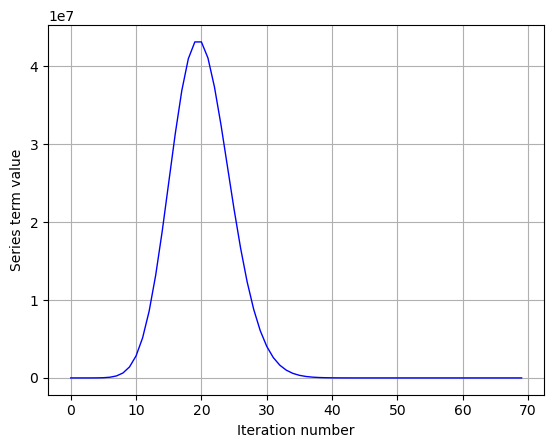

In [536]:
##We have to determine the turning point

for i in range(1, len(term_array)):
    if term_array[i]> term_array[i-1] and term_array[i] >= term_array[i+1]:
        maxima = i

print("maxima is around the iteration value: %d"  %maxima)
plt.plot(i_array, term_array, color = 'blue', linewidth = 1)
plt.xlabel("Iteration number")
plt.ylabel("Series term value")
plt.grid()
plt.show()


#### Solution of 8th part

In [537]:
##Using 4th part

exponent, f1, f2 ,f3 = exp_new(-20)
true_exp = np.exp(-20)

print("Calculated exp(-20): ", exponent)
print("Real value of exp(-20): " , true_exp)
percentage = (exponent - true_exp)/true_exp * 100
print("Percentage error: %0.3f" %(percentage))

Calculated exp(-20):  4.853431707989374e-09
Real value of exp(-20):  2.061153622438558e-09
Percentage error: 135.472


##### Here the error is caused because 